In [12]:
#https://github.com/0csong/-deep-learning-

In [13]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),
                       target_transform=None,download=True) #train용으로 사용
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),
                      target_transform=None,download=True)#test용으로 사용

mnist_train길이: 60000
mnist_test길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 5


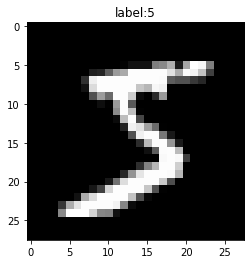

In [15]:
print ("mnist_train길이:",len(mnist_train))
print ("mnist_test길이:",len(mnist_test))

image, label=mnist_train.__getitem__(0)
print ("image data 형태:",image.size())
print ("label:",label)

img=image.numpy()
plt.title("label:%d"%label)
plt.imshow(img[0],cmap='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


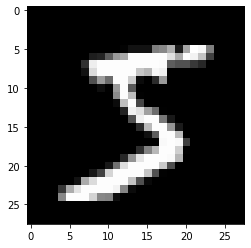

0


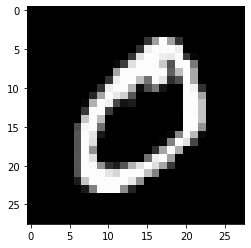

4


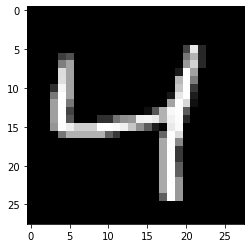

In [16]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
  img=mnist_train[i][0].numpy()
  print(mnist_train[i][1])
  plt.imshow(img[0],cmap='gray')
  plt.show()

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


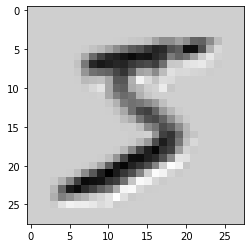

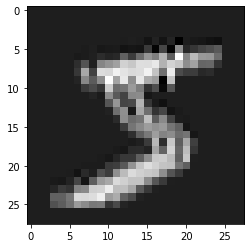

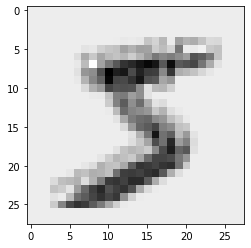

In [17]:
image, label=mnist_train[0]# 첫번쨰 이미지,라벨 가져옴
#view:tensor의 사이즈 조절.-1:해당차원 차원 확장
#[1.28.28]->[1,1,28,28]
image=image.view(-1,image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

#convolution  fillter 정의
conv_layer=nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
#image에 필터 적용
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
  plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray')
  plt.show()
  #(batch size,channel,height,width)

In [18]:
import numpy as np
import torch.optim as optim

batch_size=16
learning_rate=0.0002
num_epoch=10 #1000

In [19]:
train_loader=torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100],batch_size=batch_size,
                                         shuffle=True,num_workers=2,
                                         drop_last=True)#batch size만큼 나눌때 나머지 버림
test_loader=torch.utils.data.DataLoader((mnist_test),batch_size=batch_size,
                                         shuffle=False,num_workers=2,
                                         drop_last=True)

In [24]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__() #28*28
        self.layer=nn.Sequential(
            nn.Conv2d(1,16,5,padding=2),
            nn.ReLU(),

            nn.Conv2d(16,32,5,padding=2), #28*28  
            nn.ReLU(),   
            nn.MaxPool2d(2,2), #28*28->14*14

            nn.Conv2d(32,64,5,padding=2), #14*14
            nn.ReLU(),
            nn.MaxPool2d(2,2)#14*14->7*7
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
    
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        return out

model=CNN().cuda()

In [25]:
#파라미터 체크하기
for parameter in model.parameters():
  #print(parameter)
  print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [26]:
loss_func=nn.CrossEntropyLoss()#loss함수
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)#optimizer선택

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x=Variable(image).cuda()
        y_=Variable(label).cuda()
        
        optimizer.zero_grad() #optimizer 안에서 이전 gradient들 초기화
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()#gradient계산
        optimizer.step()#parameter
        
        if j%50==0:
            print(loss,j,i)

tensor(2.3162, device='cuda:0', grad_fn=<NllLossBackward>) 0 0
tensor(1.8696, device='cuda:0', grad_fn=<NllLossBackward>) 50 0
tensor(0.6906, device='cuda:0', grad_fn=<NllLossBackward>) 0 1
tensor(0.1341, device='cuda:0', grad_fn=<NllLossBackward>) 50 1
tensor(0.2359, device='cuda:0', grad_fn=<NllLossBackward>) 0 2
tensor(0.5246, device='cuda:0', grad_fn=<NllLossBackward>) 50 2
tensor(0.2843, device='cuda:0', grad_fn=<NllLossBackward>) 0 3
tensor(0.2982, device='cuda:0', grad_fn=<NllLossBackward>) 50 3
tensor(0.9154, device='cuda:0', grad_fn=<NllLossBackward>) 0 4
tensor(0.1963, device='cuda:0', grad_fn=<NllLossBackward>) 50 4
tensor(0.0845, device='cuda:0', grad_fn=<NllLossBackward>) 0 5
tensor(0.1085, device='cuda:0', grad_fn=<NllLossBackward>) 50 5
tensor(0.1133, device='cuda:0', grad_fn=<NllLossBackward>) 0 6
tensor(0.0283, device='cuda:0', grad_fn=<NllLossBackward>) 50 6
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>) 0 7
tensor(0.1397, device='cuda:0', grad_fn=<NllLoss

In [ ]:
#torch.save(model,'/nets.MyCnn.pkl'%(num_epoch))

In [ ]:
#try:
    #미리 학습시킨 네트뭐크의 파라미터 집합(피클이라고 발음)
    #model=torch.load('/nets.MyCnn.pkl')
    #print("model restored")
#except:
    #print("model not restored")

In [33]:
def ComputeAccr(dloader,imodel):
    correct=0
    total=0
    
    for j,[imgs,labels] in enumerate(dloader):#batchsize만큼
        img=Variable(imgs).cuda()
  
        label=Variable(labels).cuda()
       
        
        output=imodel.forward(img)#정방향 전파
        _,output_index=torch.max(output,1) 
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test data:{}" .format(100*correct/total))

In [34]:
ComputeAccr(test_loader,model)

Accuracy of Test data:94.47000122070312
